In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Canal Óptico

O canal de comunicação óptica é o resultado de diversas interações entre sinais ópticos e matéria. Esses efeitos podem ocorrer nas diversas seções de fibra óptica do link ou nos dispositivos atravessados pelo sinal óptico. 

O efeito mais fundamental para qualquer sistema de comunicação é atenuação, que reduz a potência do sinal ao longo do link como resultado de fenômenos de absorção e espalhamento. Devido à atenuação, os sinais transmitidos precisam ser amplificados periodicamente por amplificadores em linha, que inserem ruído e limitam o alcance do sistema.

Neste notebook não iremos abordar todos esses efeitos, mas apenas aqueles mais significativos para a modelagem de sistemas ópticos digitais coerentes.

### 3.2 Chromatic Dispersion

A dispersão do modo de polarização (*Polarization mode dispersion* - PMD) e a dispersão cromática (*Chromatic Dispersion* - CD) são dois efeitos lineares importantes que espalham símbolos ao longo do tempo e causam interferência. Eles geralmente são compensados no receptor usando usando tecnicas de processamento digital de sinais (DSP) Embora o PMD e o CD individualmente não limitem a capacidade, eles influenciam a complexidade do DSP do receptor, pois o CD pode exigir equalizadores estáticos muito longos e o PMD exige equalização adaptativa.

Neste tópico estamos interessados em transmitir informações através de fibras ópticas. A informação é transmitida apenas por pacotes de frequências, formando um padrão que viaja pela fibra com velocidade de grupo $v_g$

$$v_{g}=\left({\frac{d\beta}{d\omega}}\right)^{-1}$$

onde $\beta$ é a constante de propagação. Outro conceito necessário para entendermos esse fenômeno é a velocidade de fase $v_p$ de um sinal senoidal com frequência $\omega$ dado por

$$\ v_{p}={\frac{\omega}{\beta}}$$

Se a constante de propagação tiver uma dependência linear com a frequência, então $v_g = v_p$, qualquer grupo de frequências de propagação terá a mesma velocidade de grupo e os pulsos não serão distorcidos. É o caso, por exemplo, das ondas planas que viajam no espaço livre. Entretanto, em guias de onda práticos, a constante de propagação $\beta$ tem uma dependência não linear de $\omega$. Assim, diferentes componentes espectrais de um modo guiado se propagam com velocidades de grupo distintas, dando origem ao fenômeno conhecido como CD.

Se não for compensado, o CD amplia os pulsos de propagação e leva à interferência intersimbólica (ISI), como mostrado na figura abaixo que demostra o efeito do CD na propagação do sinal. CD espalha os pulsos no tempo, levando à interferência intersimbólica (ISI)

<br>
<center>
    <img src="https://i.postimg.cc/6pYm6pmx/Dispers-o.png">
</center>
<br>

Considerando um guia de ondas sem perdas, os componentes de um campo elétrico ou magnético de frequência $\omega$ variam na direção de propagação no eixo $z$ de acordo com

$$E(z,\omega)=E(0,\omega)e^{-j\beta(\omega)z}$$

onde $\beta(w)$ é a constante de propagação em $\omega$. A mesma análise pode ser realizada para os componentes de frequência do espectro ${\tilde{A}}\left(z,\,0\right)$ do sinal $A(z, t)$, expandindo $\beta(\omega)$ na série de Taylor em torno da frequência angular da portadora $\omega_c$

$$\tilde{A}(z,\omega)=\tilde{A}(0,\omega)e^{-j\beta(\omega)z}$$
$$\tilde{A}(z,\omega)=\tilde{A}(0,\omega)e^{-\Big(j\beta_{0}+j\beta_{1}\Delta\omega+\frac{j\beta_{2}}{2}\Delta\omega^{2}+\ldots\Big)z}$$

Onde $\beta_i$ é a i-ésima derivada de $\beta$ em relação a $\omega$, e $\Delta\omega=\omega-\omega_{c}.$ O termo $e^{j\beta_{0}z}$ é uma mudança de fase. A multiplicação por $e^{j\beta_{1}\Delta\omega z}$ gera um deslocamento de tempo de um pulso não distorcido. 

A dispersão cromática está relacionada ao termo $e^{\frac{\beta_{2}}{2}\Delta\omega^{2}z}$. Para um observador viajando com o pulso, o espectro de um sinal corrompido por CD pode ser calculado como

$$\tilde{A}(z,\omega)=\tilde{A}(0,\omega)e^{-\frac{j\beta_{2}z}{2}\Delta\omega^{2}}$$

Podemos observar o efeito de disperção como um filtro passa tudo que modifica apenas a fase do nosso sinal, onde a amplitude e mantida constante. O parâmetro $\beta_2$ tem unidades de $s/m/[rad/s]$ e fornece a dispersão dos pulsos (em segundos) por unidade de comprimento de fibra (em metros) e por unidade de largura de banda espectral (em radianos por segundo). 

Na especificação de fibras ópticas, entretanto, a dispersão é geralmente quantificado pelo parâmetro de dispersão de velocidade de grupo (GVD), D, em unidades de $s/m^2$, ou melhor, em $ps/nm/km$. O parâmetro GVD indica a propagação do pulso (em picossegundos), por unidade de distância (em quilômetros), por unidade de largura de banda espectral (em nanômetros). Os parâmetros D e $\beta_2$ estão relacionados por

$$D=-{\frac{2\pi c}{\lambda^{2}}}\beta_{2},$$

Onde $c$ é a velocidade da luz no vácuo e $\lambda$ é o comprimento de onda operacional.

### Efeito da Dispersão

Caracteristicas da dispersão a partir da função de transferência do canal, desprezando as perdas.

In [30]:
# parâmetros da simulação
Fa = 100                                       # Frequência de amostragem
NFFT = 1024                                    # Tamanho da FFT
freq = Fa/NFFT * np.arange(-NFFT/2, NFFT/2)    # Intervalo de frequências
beta2 = 15e-6                                  # Parâmetro GVD
z = 150                                        # Distância de propagação [comprimento da fibra em metros]

$$H(\omega) = e^{j{\frac{\beta_{2}}{2}}\omega^{2}z}$$

In [31]:
H = np.exp(1j*0.5*beta2*z*(2*np.pi*freq)**2) # Função de transferência do canal

Observe que apenas a fase é alterada, a amplitude se mantém constante.

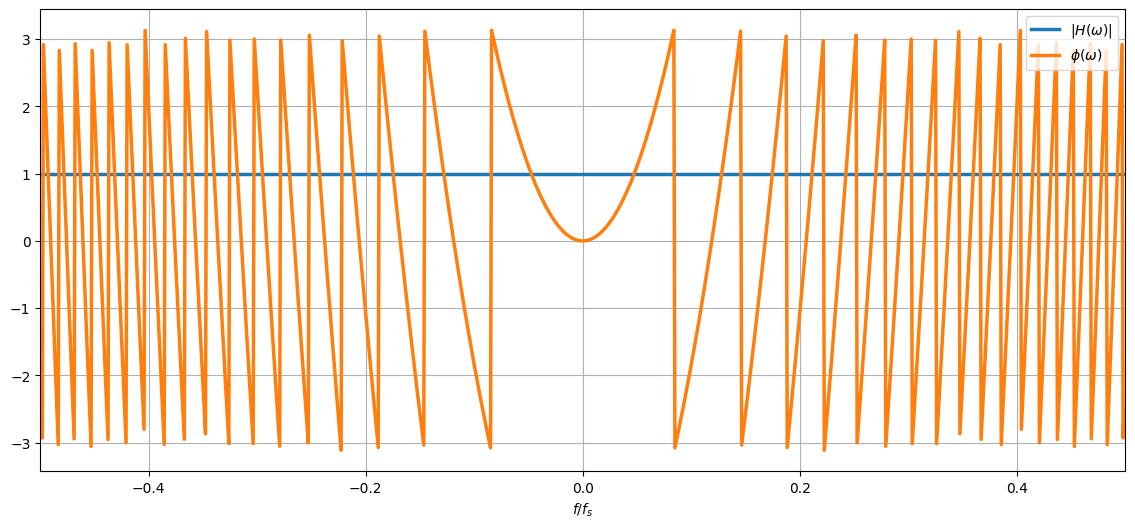

In [32]:
fig = plt.figure(figsize=(14, 6))
#plt.plot(freq/Fa, H.real, freq/Fa, H.imag)
plt.plot(freq/Fa, abs(H), freq/Fa, np.angle(H), linewidth=2.5)
plt.xlabel(r'$f/f_s$')
plt.xlim([-0.5, 0.5])
#plt.legend(['Real', 'Imag'], loc = 'upper right')
plt.legend([r'$|H(\omega)|$', r'$\phi(\omega)$'], loc = 'upper right')
plt.grid(True)

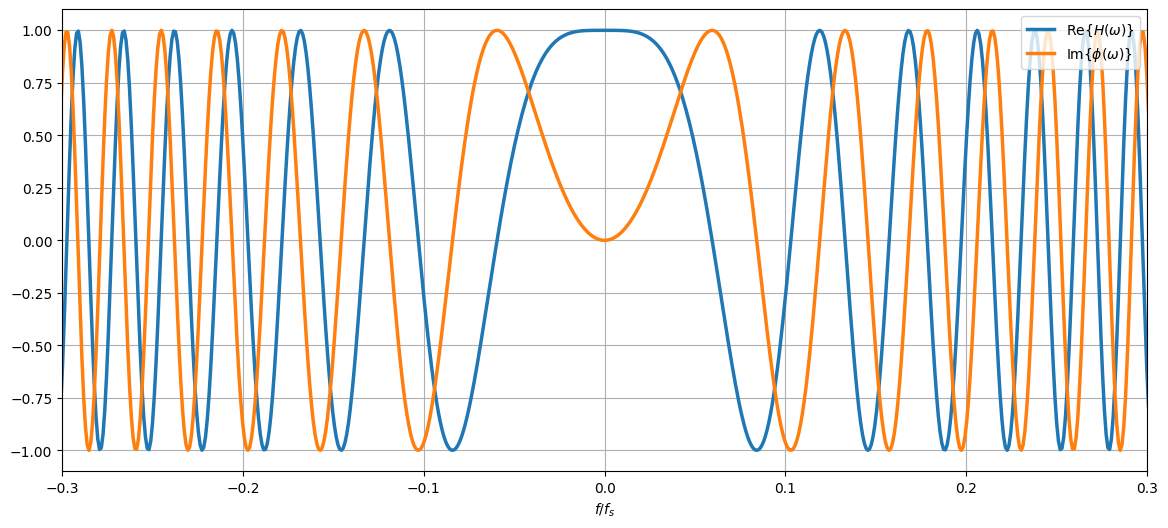

In [33]:
fig = plt.figure(figsize=(14, 6))
plt.plot(freq/Fa, H.real, freq/Fa, H.imag, linewidth=2.5)
plt.xlabel(r'$f/f_s$')
plt.xlim([-0.3, 0.3])
plt.legend(['Real', 'Imag'], loc = 'upper right')
plt.legend([r'Re{$H(\omega)$}', r'Im{$\phi(\omega)$}'], loc = 'upper right')
plt.grid(True)

### Simulação de transmissão 10G 4-PAM com dispersão e ruído gaussiano

In [56]:
from optic.comm.modulation import modulateGray
from optic.dsp.core import pnorm, upsample, firFilter, pulseShape
from optic.models.devices import mzm
from optic.utils import parameters, dBm2W

In [57]:
# Parâmetros da simulação.
M = 4                   # Ordem da modulação
constType = 'pam'       # Esquema de modulação
pulseType = 'nrz'       # Pulso a ser utilizado
Rs = 10e9               # Taxa de símbolos [símbolo/s]
Ts = 1/Rs               # Período de símbolo em segundos
SpS = 32                # Amostras por símbolo
Fa = 1/(Ts/SpS)         # Frequência de amostragem do sinal [amostras/segundo]
Ta = 1/Fa               # Período de amostragem
Ncoeff = 1024           # Número de coeficientes do filtro RC
alpha = 0.05            # Rolloff

λ = 1550e-9     # comprimento de onda
c = 299792458   # velocidade da luz [m/s]

# parâmetros do MZM
paramMZM = parameters()
paramMZM.Vpi = 2
paramMZM.Vb = -paramMZM.Vpi/2

# Parâmetros da fibra
D = 18e-6                        # Parâmetro de dispersão ps/(nm*km) - SMF28
beta2 = -(D*λ**2)/(2*np.pi*c)    # GVD
z = 70e3                         # Comprimento do link

Distância sobre a qual um pulso se espalha ou dispersa ao viajar através da fibra.

$$LD = \frac{T_{s}^2}{|\beta_2|}$$

In [58]:
LD = (Ts**2)/abs(beta2)
print('Comprimento de dispersão (m): %f' %(LD))

Comprimento de dispersão (m): 435576.729636


In [59]:
# gera uma sequência de bits pseudo-aleatórios que chegam ao transmissor
bitsTx = np.random.randint(2, size = int(1e4*np.log2(M)))

# Gera o mapeamento dos bits para símbolos M-PAM
symbTx = modulateGray(bitsTx, M, constType)    
symbTx = pnorm(symbTx) # power normalization

symbolsUp = upsample(symbTx, SpS)

# seleciona o pulso desejado.
if pulseType == "nrz" or pulseType == "rect":
    pulse = pulseShape(pulseType, SpS)
elif pulseType == "rc":
    pulse = pulseShape(pulseType, SpS, Ncoeff, alpha, Ts)

pulse = pulse/max(abs(pulse))
# formatação de pulso
sigTx = firFilter(pulse, symbolsUp)

# adiciona ruído gaussiano ao sinal em banda base
samples = sigTx.size    # amostras
σ2 = 0.005              # variância
μ  = 0                  # média
σ  = np.sqrt(σ2)        # devio padrão

# Gerando ruído branco
noise = np.random.normal(μ, σ, samples)
sigTx = sigTx + noise

# Laser power
Pi_dBm = -16        # potência óptica do laser na entrada do MZM em dBm
Pi = dBm2W(Pi_dBm)  # converter de dBm para W

# optical modulation
Ai = np.sqrt(Pi)
sigTxo = mzm(Ai, sigTx.real, paramMZM)

print('Potência média do sinal óptico modulado [mW]: %.3f mW'%(signal_power(sigTxo)/1e-3))
print('Potência média do sinal óptico modulado [dBm]: %.3f dBm'%(10*np.log10(signal_power(sigTxo)/1e-3)))

Potência média do sinal óptico modulado [mW]: 0.013 mW
Potência média do sinal óptico modulado [dBm]: -18.985 dBm


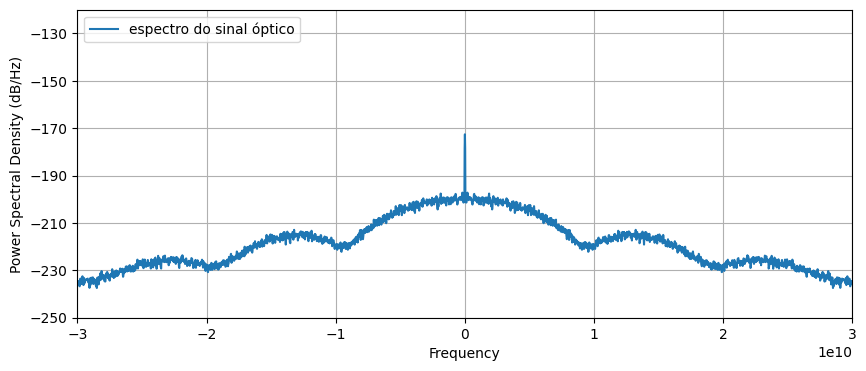

In [60]:
# plot psd
plt.figure(figsize=(10, 4))
plt.xlim(-3*Rs, 3*Rs)
plt.ylim(-250, -120)
plt.psd(np.abs(sigTxo)**2, Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'espectro do sinal óptico')
plt.legend(loc='upper left');

### Transmitindo o sinal na fibra

In [61]:
# transformada de fourier do sinal óptico
sigTxoFFT = np.fft.fftshift(np.fft.fft(sigTxo))/len(sigTxo)
# define um intervalo de frequências 
freq = np.fft.fftshift(np.fft.fftfreq(len(sigTxoFFT), Ta))
# função de transferência do canal desprezando as perdas
H = np.exp(1j*0.5*beta2*z*(2*np.pi*freq)**2)

# obtém a resposta ao impulso do sinal óptico após a fibra
sigRxFFT = H * sigTxoFFT
# sinal óptico no domínio do tempo
sigRxo = np.fft.ifft(sigRxFFT)*len(sigTxo)

t = np.arange(0, symbTx.size)*(Ta/1e-9)

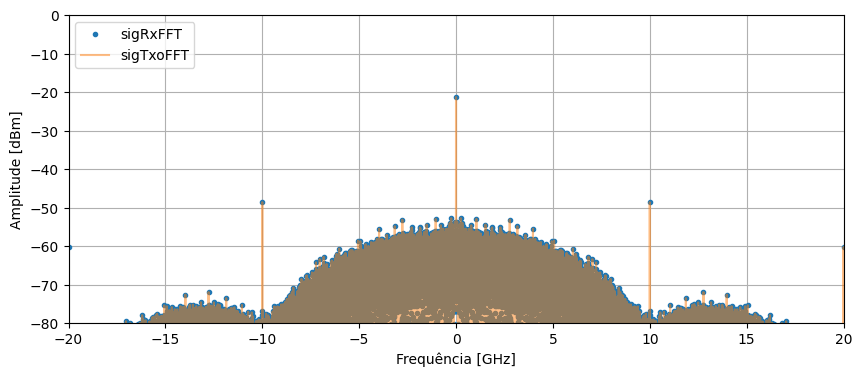

In [62]:
plt.figure(None, figsize=(10, 4))

plt.plot(1e-9*freq, 10*np.log10(1e3*np.abs(sigRxFFT)**2), '.', label = 'sigRxFFT')
plt.plot(1e-9*freq, 10*np.log10(1e3*np.abs(sigTxoFFT)**2), alpha = 0.5, label = 'sigTxoFFT')
plt.ylabel('Amplitude [dBm]')
plt.xlabel('Frequência [GHz]')
plt.xlim(-2e-9*Rs,2e-9*Rs)
plt.ylim(-80,0)
plt.grid(True)
plt.legend(loc = 'upper left')

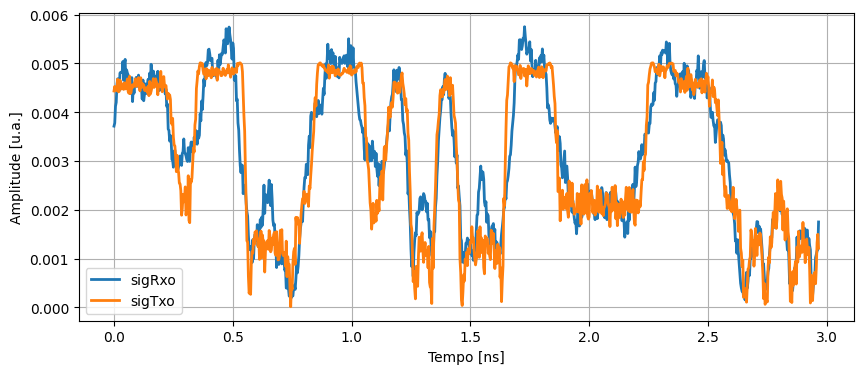

In [64]:
plt.figure(None, figsize=(10, 4))

plt.plot(t[0:950], abs(sigRxo[0:950]), linewidth=2, label = 'sigRxo')
plt.plot(t[0:950], abs(sigTxo[0:950]), linewidth=2, label = 'sigTxo')
plt.xlabel('Tempo [ns]')
plt.ylabel('Amplitude [u.a.]')
plt.grid(True)
plt.legend(loc = 'lower left')